In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_submission = pd.read_csv('data/sample_submission.csv')


In [55]:
df_train.head()

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   0    Male 24.44    1.70   81.67                            yes  yes  2.00   
1   1  Female 18.00    1.56   57.00                            yes  yes  2.00   
2   2  Female 18.00    1.71   50.17                            yes  yes  1.88   
3   3  Female 20.95    1.71  131.27                            yes  yes  3.00   
4   4    Male 31.64    1.91   93.80                            yes  yes  2.68   

   NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0 2.98   Sometimes    no  2.76  no 0.00 0.98  Sometimes   
1 3.00  Frequently    no  2.00  no 1.00 1.00         no   
2 1.41   Sometimes    no  1.91  no 0.87 1.67         no   
3 3.00   Sometimes    no  1.67  no 1.47 0.78  Sometimes   
4 1.97   Sometimes    no  1.98  no 1.97 0.93  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __20758 entries__, ranging from index 0 to 20757.
    
    
* __Columns__: There are __18 columns__ in the dataset corresponding to various attributes of the patients and results of tests.
    
    
* __Data Types__:
    - Half of the columns (9 out of 18) are of the __object__ data type.
    
    
* __Missing Values__: There don't appear to be any missing values in the dataset as each column has 20758 non-null entries.

In [57]:
df_train.head()

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   0    Male 24.44    1.70   81.67                            yes  yes  2.00   
1   1  Female 18.00    1.56   57.00                            yes  yes  2.00   
2   2  Female 18.00    1.71   50.17                            yes  yes  1.88   
3   3  Female 20.95    1.71  131.27                            yes  yes  3.00   
4   4    Male 31.64    1.91   93.80                            yes  yes  2.68   

   NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0 2.98   Sometimes    no  2.76  no 0.00 0.98  Sometimes   
1 3.00  Frequently    no  2.00  no 1.00 1.00         no   
2 1.41   Sometimes    no  1.91  no 0.87 1.67         no   
3 3.00   Sometimes    no  1.67  no 1.47 0.78  Sometimes   
4 1.97   Sometimes    no  1.98  no 1.97 0.93  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [58]:
# Define the continuous features
continuous_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP' ,'CH2O','FAF','TUE']

# Identify the features to be converted to object data type
categorical_features = [feature for feature in df_train.columns if feature not in continuous_features]


<span style="font-size: 200%; font-weight: bold;">Let's dive into the summary statistics for our __numerical__attributes::</span> 

In [59]:
df_train.describe().T

count     mean     std   min     25%      50%      75%      max
id     20758.00 10378.50 5992.46  0.00 5189.25 10378.50 15567.75 20757.00
Age    20758.00    23.84    5.69 14.00   20.00    22.82    26.00    61.00
Height 20758.00     1.70    0.09  1.45    1.63     1.70     1.76     1.98
Weight 20758.00    87.89   26.38 39.00   66.00    84.06   111.60   165.06
FCVC   20758.00     2.45    0.53  1.00    2.00     2.39     3.00     3.00
NCP    20758.00     2.76    0.71  1.00    3.00     3.00     3.00     4.00
CH2O   20758.00     2.03    0.61  1.00    1.79     2.00     2.55     3.00
FAF    20758.00     0.98    0.84  0.00    0.01     1.00     1.59     3.00
TUE    20758.00     0.62    0.60  0.00    0.00     0.57     1.00     2.00

<a id="import"></a>
# <p style="background-color:#ef271b; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:25px ;">EDA </p>


In [60]:
df_train.duplicated().sum()

0

<a id="univariate"></a>
# <b></span><span style='color:red'> Univariate Analysis</span></b>

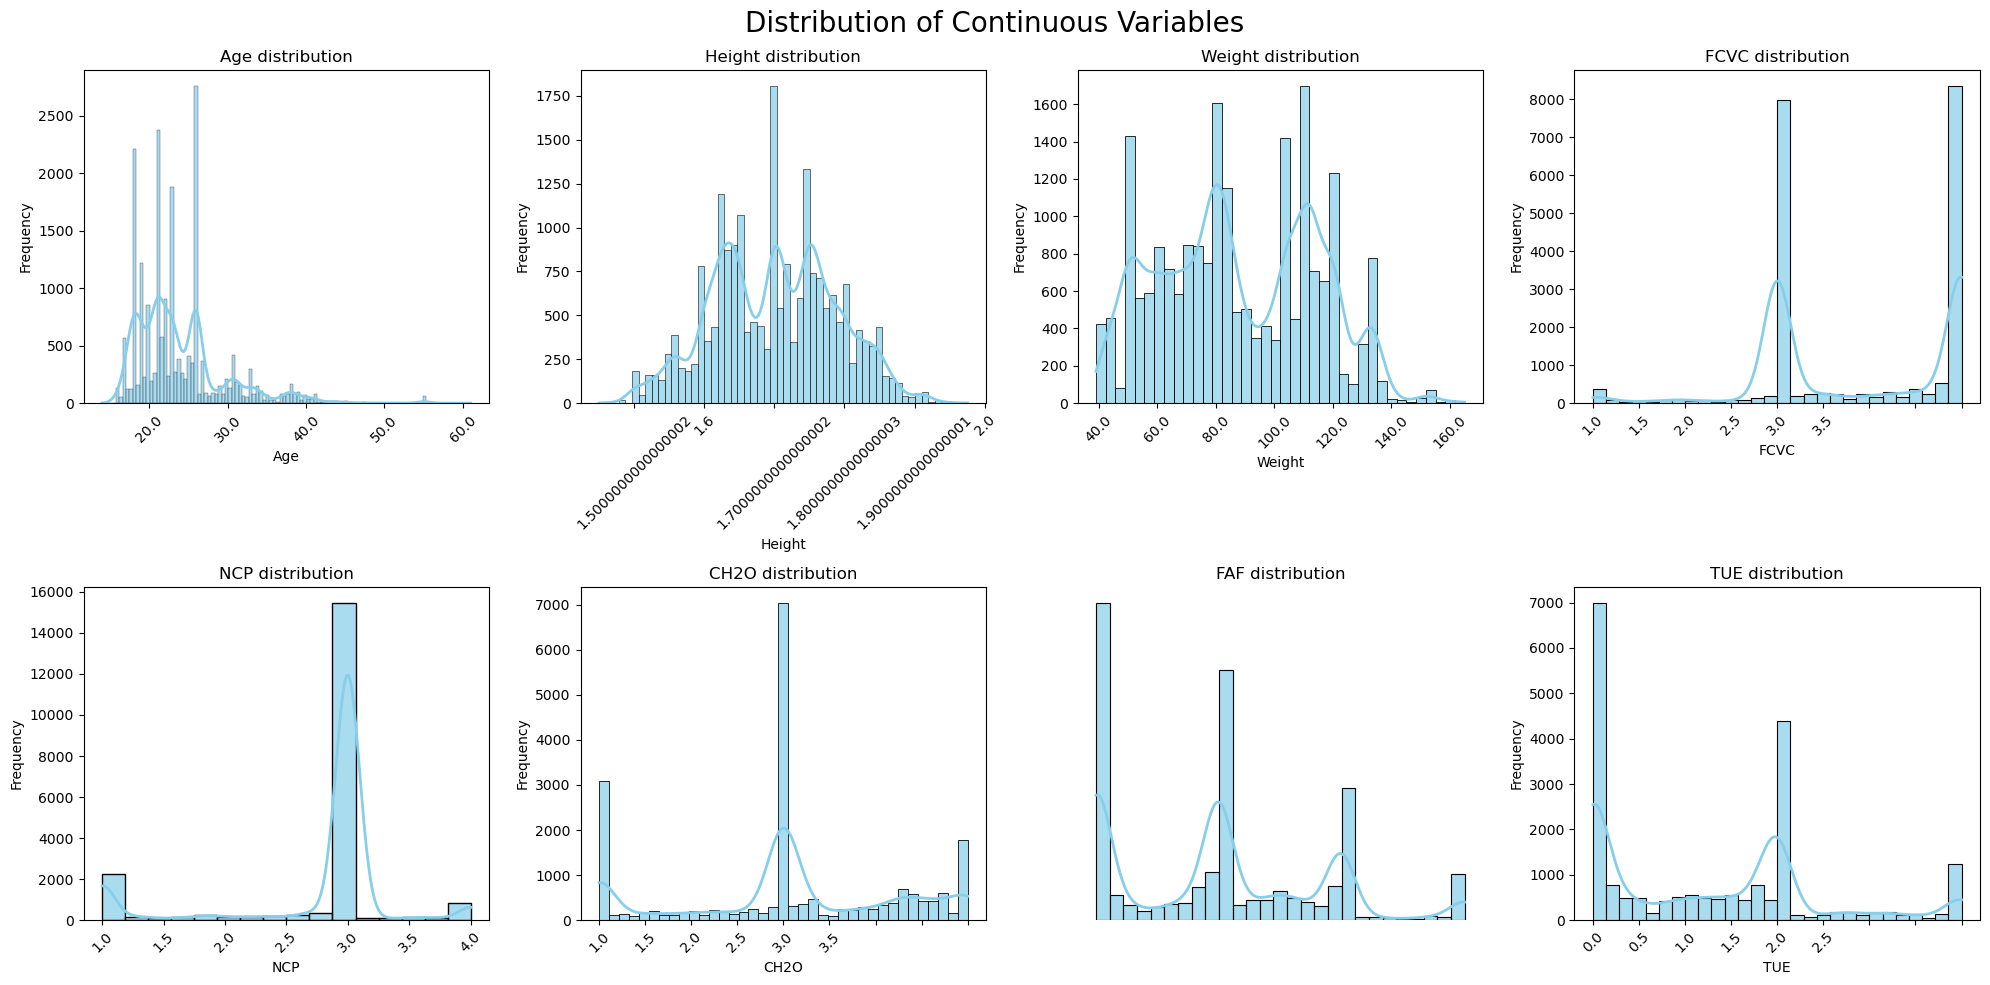

In [61]:
df_continuous = df_train[continuous_features]

fig , ax = plt.subplots(2,4, figsize=(20,10))

for i, feature in enumerate(continuous_features):
    x = i // 4
    y = i % 4
    
    values , bins = np.histogram(df_continuous[feature], bins=20 , range=(df_continuous[feature].min(), df_continuous[feature].max()))
    
    graph = sns.histplot(df_continuous[feature], kde=True, ax=ax[x,y] , edgecolor='black' , color='skyblue' , alpha=0.7 , line_kws = {'linewidth':2})
    
    ax[x,y].set_title(f'{feature} distribution')
    ax[x,y].set_xlabel(feature)
    ax[x,y].set_ylabel('Frequency')
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

    
    

<a id="cat_uni"></a>
### <b><span style='color:#ff826e'></span><span style='color:red'> Categorical Variables Univariate Analysis</span></b>  

In [62]:
categorical_features

['id',
 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [63]:
categorical_features.remove('id')

In [64]:
df_categorical = df_train[categorical_features]


In [65]:
# mapping = {
#     "0": 'Insufficient_Weight',
#     "1": 'Normal_Weight',
#     "2": 'Obesity_Type_I',
#     "3": 'Obesity_Type_II',
#     "4": 'Obesity_Type_III',
#     "5": 'Overweight_Level_I',
#     "6": 'Overweight_Level_II',
# }

# df_train['NObeyesdad'] = df_train['NObeyesdad'].map(mapping)

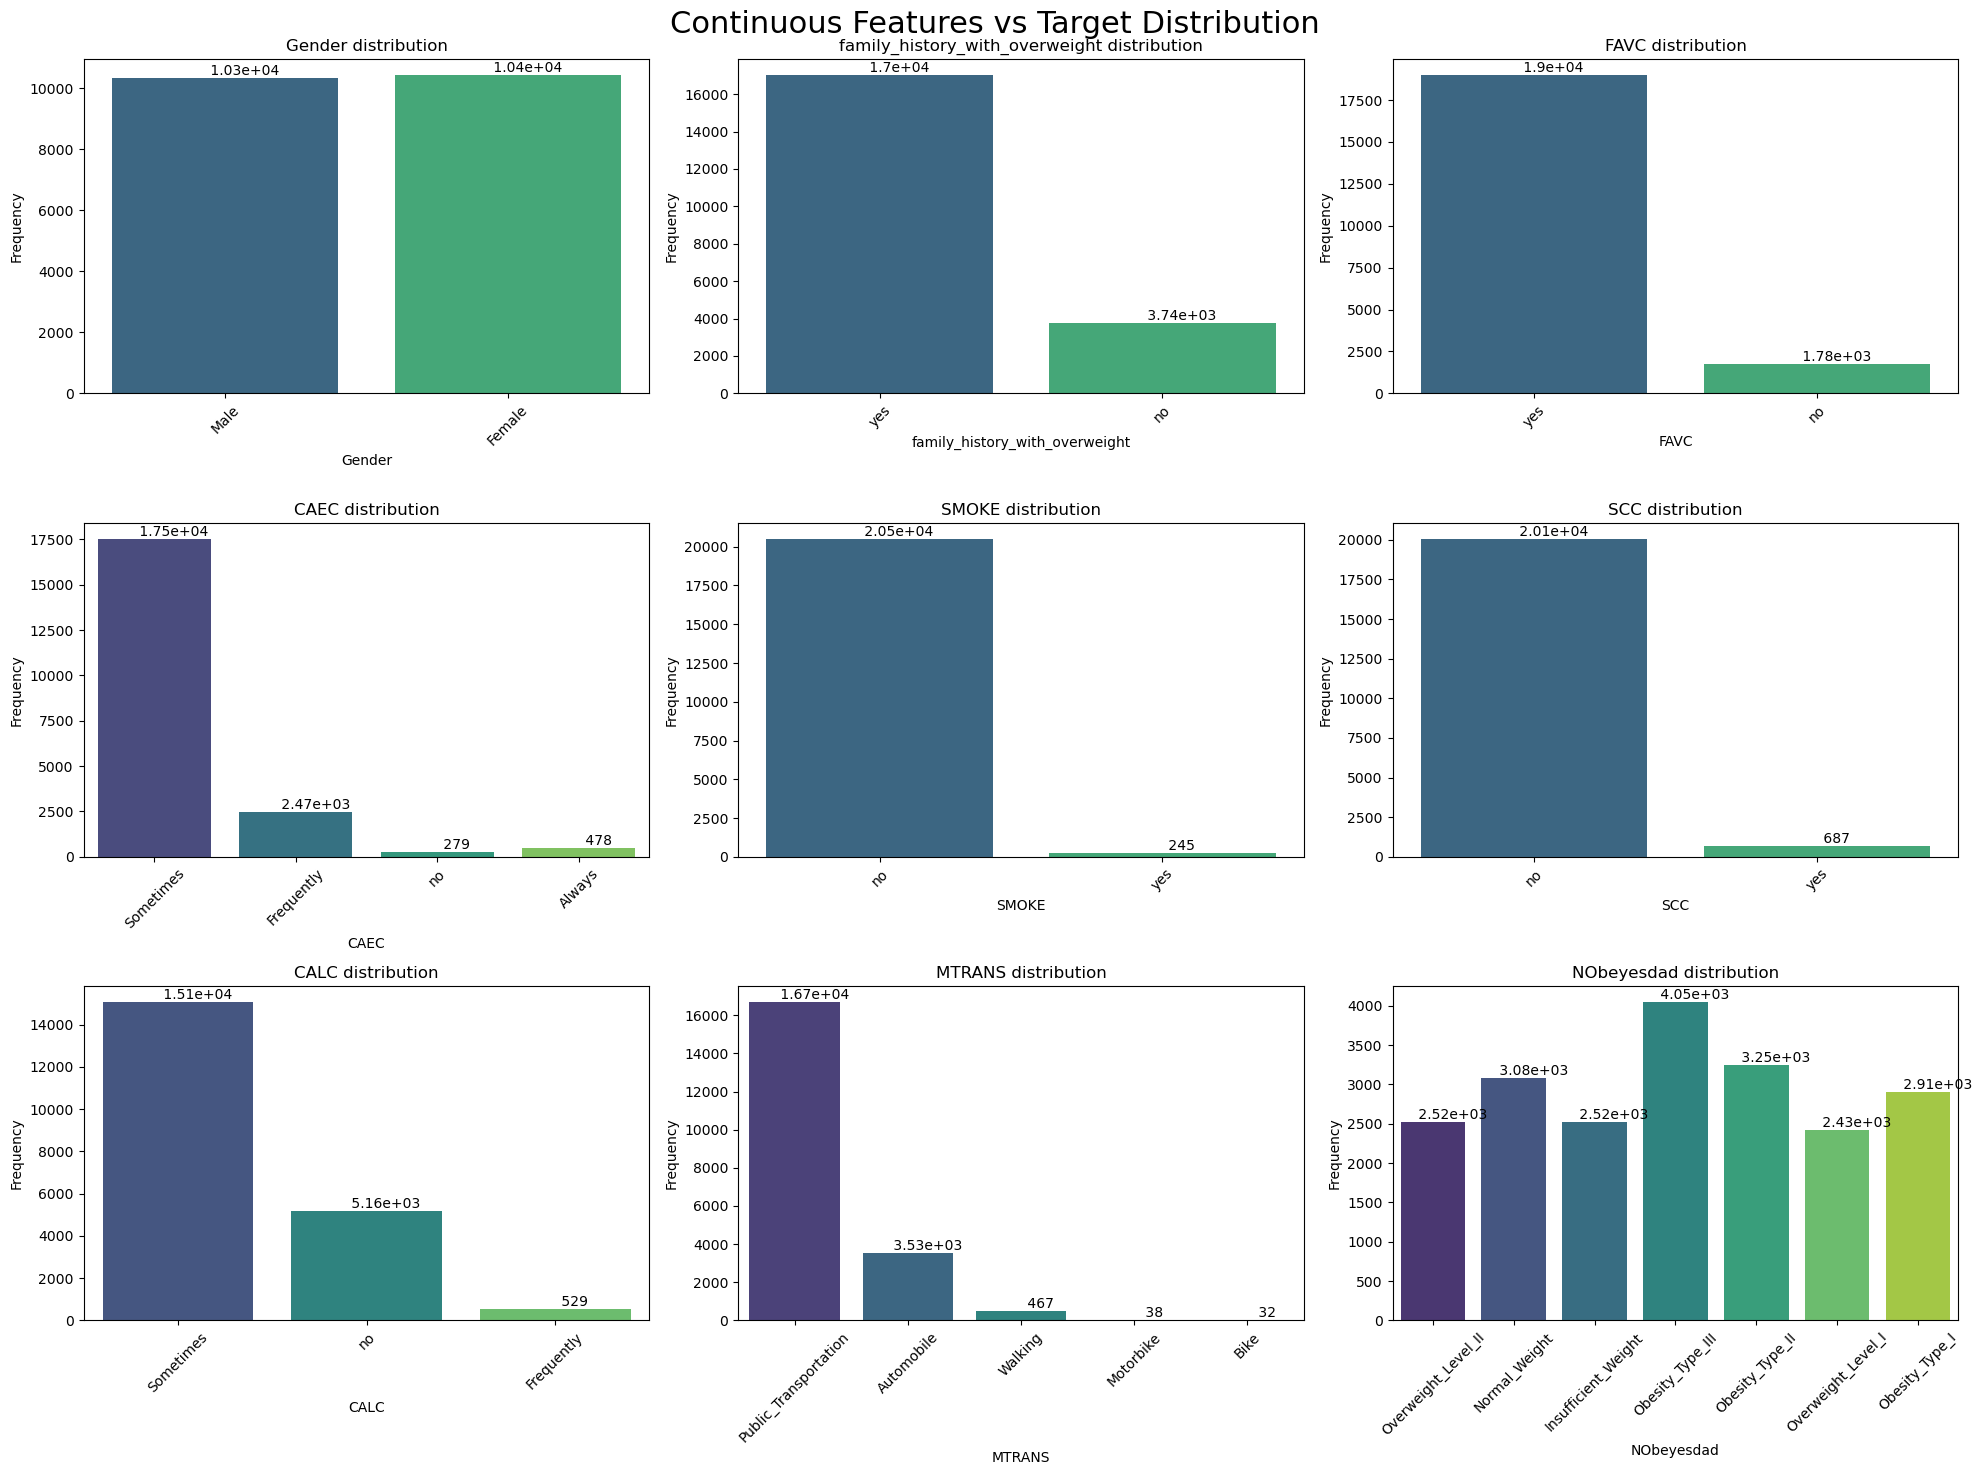

In [66]:
fig, ax = plt.subplots(3,3, figsize=(20,15))

for i, feature in enumerate(categorical_features):
    
    x = i // 3
    y = i % 3
    
    graph = sns.countplot(x=feature, data=df_categorical, ax=ax[x,y], palette='viridis')
    ax[x,y].set_title(f'{feature} distribution')
    ax[x,y].set_xlabel(feature)
    ax[x,y].set_ylabel('Frequency')
    xlabel = ax[x,y].get_xticklabels()
    ax[x,y].set_xticklabels(xlabel, rotation=45)
    
    
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
        
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()        

<a id="bivariate"></a>
# <b><span style='color:red'> Bivariate Analysis</span></b>

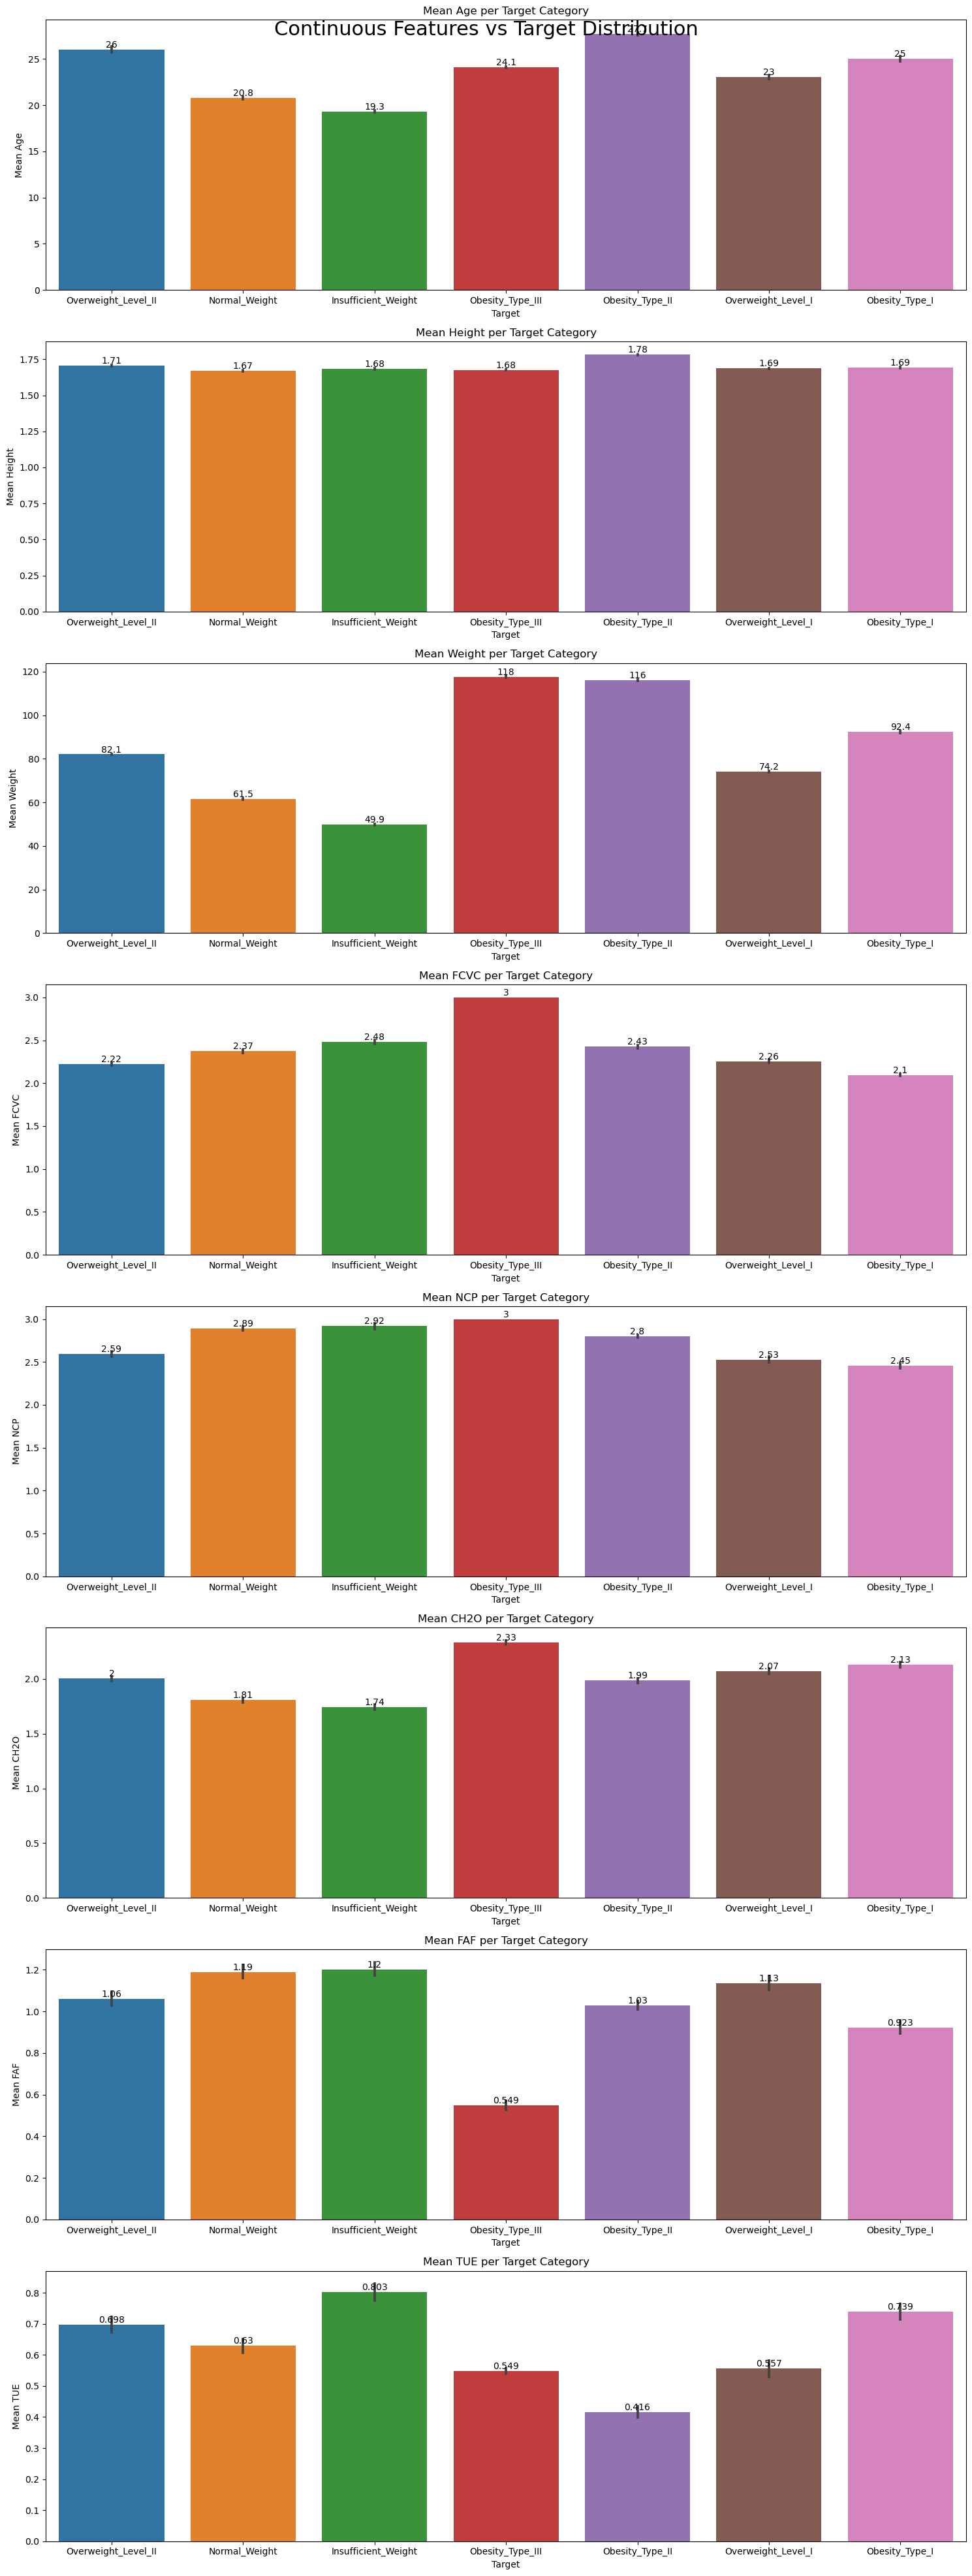

In [67]:
# Set color palette
fig, ax = plt.subplots(len(continuous_features), 1, figsize=(15, 5 * len(continuous_features)))

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df_train, x="NObeyesdad", y=col, ax=ax[i])
    ax[i].set_title(f'Mean {col} per Target Category')
    ax[i].set_xlabel('Target')
    ax[i].set_ylabel(f'Mean {col}')

    # Add mean values to the barplot
    for p in graph.patches:
        graph.annotate(f'{p.get_height():.3g}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

<a id="cat_target"></a>
### <b><span style='color:#ff826e'></span><span style='color:red'> Categorical Features vs Target</span></b>  

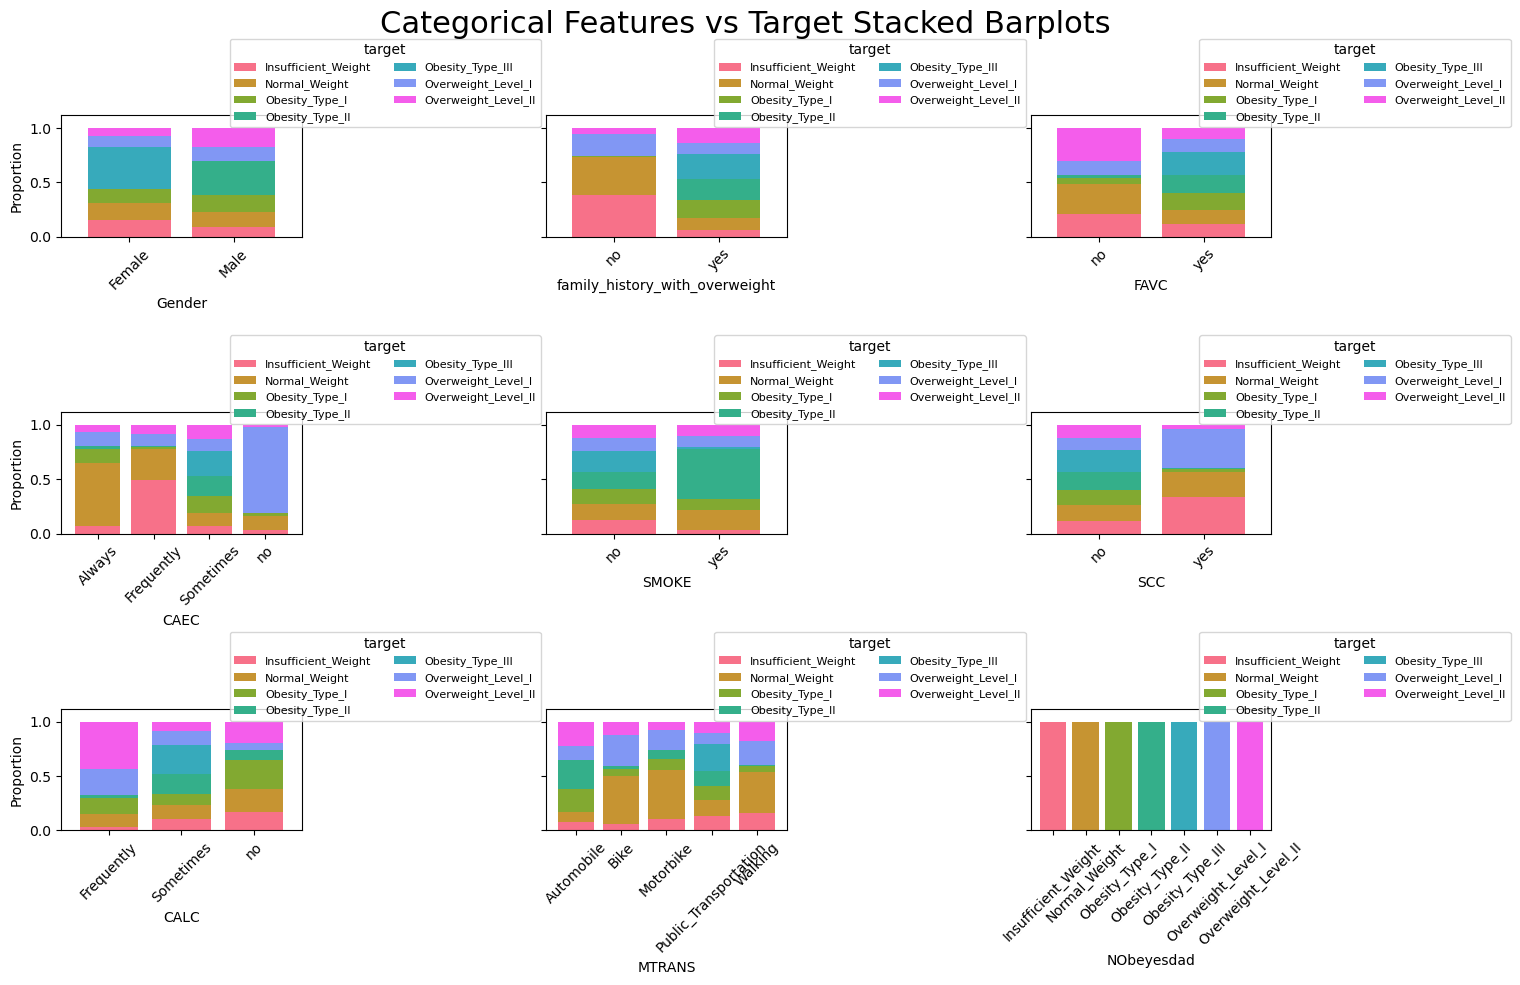

In [68]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

custom_palette = sns.color_palette("husl", n_colors=len(df_train['NObeyesdad'].unique()))


for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df_train[col], columns=df_train['NObeyesdad'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df_train[col], columns=df_train['NObeyesdad'], normalize='index')


    
    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8,
                        legend=False, ylabel='Proportion', sharey=True , color=custom_palette)
    
    # # Add the proportions and counts of the individual bars to our plot
    # for idx, val in enumerate([*cross_tab.index.values]):
    #     for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
    #         ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
    #                      s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
    #                      color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=45)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

<a id="missing"></a>
# <b><span style='color:red'> Missing Value Treatment</span></b>

In [69]:
df_train.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

there is no missing value in the dataset

<a id="outlier"></a>
# <b><span style='color:red'> Outlier Treatment</span></b>

In [70]:
continuous_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [71]:
Q1 = df_train[continuous_features].quantile(0.25)
Q3 = df_train[continuous_features].quantile(0.75)

IQR = Q3 - Q1

outliers = (df_train[continuous_features] < (Q1 - 1.5 * IQR)) | (df_train[continuous_features] > (Q3 + 1.5 * IQR))

outliers.sum()

Age       1074
Height       4
Weight       0
FCVC         0
NCP       6052
CH2O         0
FAF          0
TUE          0
dtype: int64

<a id="encoding"></a>
# <b><span style='color:red'> Categorical Features Encoding</span></b>

In [72]:
continuous_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [73]:
categorical_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [74]:
df_train.head()

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   0    Male 24.44    1.70   81.67                            yes  yes  2.00   
1   1  Female 18.00    1.56   57.00                            yes  yes  2.00   
2   2  Female 18.00    1.71   50.17                            yes  yes  1.88   
3   3  Female 20.95    1.71  131.27                            yes  yes  3.00   
4   4    Male 31.64    1.91   93.80                            yes  yes  2.68   

   NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0 2.98   Sometimes    no  2.76  no 0.00 0.98  Sometimes   
1 3.00  Frequently    no  2.00  no 1.00 1.00         no   
2 1.41   Sometimes    no  1.91  no 0.87 1.67         no   
3 3.00   Sometimes    no  1.67  no 1.47 0.78  Sometimes   
4 1.97   Sometimes    no  1.98  no 1.97 0.93  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [75]:
df_train[categorical_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [76]:
df_train['CAEC'].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [77]:
df_train['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [78]:
# ordinal features: CAEC , CALC 
ordinal_features = ['CAEC', 'CALC']

# encoding the ordinal features
def encode_ordinal_features(df, ordinal_features):
    df[ordinal_features] = df[ordinal_features].replace({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
    return df


df_train = encode_ordinal_features(df_train, ordinal_features)
df_test = encode_ordinal_features(df_test, ordinal_features)


In [79]:
df_train.head()

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   0    Male 24.44    1.70   81.67                            yes  yes  2.00   
1   1  Female 18.00    1.56   57.00                            yes  yes  2.00   
2   2  Female 18.00    1.71   50.17                            yes  yes  1.88   
3   3  Female 20.95    1.71  131.27                            yes  yes  3.00   
4   4    Male 31.64    1.91   93.80                            yes  yes  2.68   

   NCP  CAEC SMOKE  CH2O SCC  FAF  TUE  CALC                 MTRANS  \
0 2.98     1    no  2.76  no 0.00 0.98     1  Public_Transportation   
1 3.00     2    no  2.00  no 1.00 1.00     0             Automobile   
2 1.41     1    no  1.91  no 0.87 1.67     0  Public_Transportation   
3 3.00     1    no  1.67  no 1.47 0.78     1  Public_Transportation   
4 1.97     1    no  1.98  no 1.97 0.93     1  Public_Transportation   

            NObeyesdad  
0  Overweight_Level_II  
1        Normal_Weight  
2  Insufficient_Weight  
3     Obesity_Type_III  
4  Overweight_Level_II

In [80]:
categorical_features.remove(ordinal_features[0])
categorical_features.remove(ordinal_features[1])

In [81]:
nominal_features = categorical_features

In [82]:
nominal_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'SMOKE',
 'SCC',
 'MTRANS',
 'NObeyesdad']

In [83]:
# encoding the nominal features

def encode_nominal_features(df, nominal_features):
    df = pd.get_dummies(df, columns=nominal_features, drop_first=True, dtype='int64')
    return df

nominal_features.remove('NObeyesdad')
df_train = encode_nominal_features(df_train, nominal_features)
df_test = encode_nominal_features(df_test, nominal_features)

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  20758 non-null  int64  
 1   Age                                 20758 non-null  float64
 2   Height                              20758 non-null  float64
 3   Weight                              20758 non-null  float64
 4   FCVC                                20758 non-null  float64
 5   NCP                                 20758 non-null  float64
 6   CAEC                                20758 non-null  int64  
 7   CH2O                                20758 non-null  float64
 8   FAF                                 20758 non-null  float64
 9   TUE                                 20758 non-null  float64
 10  CALC                                20758 non-null  int64  
 11  NObeyesdad                          20758

In [85]:
df_train.head()

id   Age  Height  Weight  FCVC  NCP  CAEC  CH2O  FAF  TUE  ...  \
0   0 24.44    1.70   81.67  2.00 2.98     1  2.76 0.00 0.98  ...   
1   1 18.00    1.56   57.00  2.00 3.00     2  2.00 1.00 1.00  ...   
2   2 18.00    1.71   50.17  1.88 1.41     1  1.91 0.87 1.67  ...   
3   3 20.95    1.71  131.27  3.00 3.00     1  1.67 1.47 0.78  ...   
4   4 31.64    1.91   93.80  2.68 1.97     1  1.98 1.97 0.93  ...   

            NObeyesdad Gender_Male  family_history_with_overweight_yes  \
0  Overweight_Level_II           1                                   1   
1        Normal_Weight           0                                   1   
2  Insufficient_Weight           0                                   1   
3     Obesity_Type_III           0                                   1   
4  Overweight_Level_II           1                                   1   

   FAVC_yes  SMOKE_yes  SCC_yes  MTRANS_Bike  MTRANS_Motorbike  \
0         1          0        0            0                 0   
1         1          0        0            0                 0   
2         1          0        0            0                 0   
3         1          0        0            0                 0   
4         1          0        0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             0               0  
2                             1               0  
3                             1               0  
4                             1               0  

[5 rows x 21 columns]

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  20758 non-null  int64  
 1   Age                                 20758 non-null  float64
 2   Height                              20758 non-null  float64
 3   Weight                              20758 non-null  float64
 4   FCVC                                20758 non-null  float64
 5   NCP                                 20758 non-null  float64
 6   CAEC                                20758 non-null  int64  
 7   CH2O                                20758 non-null  float64
 8   FAF                                 20758 non-null  float64
 9   TUE                                 20758 non-null  float64
 10  CALC                                20758 non-null  int64  
 11  NObeyesdad                          20758

In [87]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [88]:
# Scale the continuous features

scaler = StandardScaler()

df_train[continuous_features] = scaler.fit_transform(df_train[continuous_features])
df_test[continuous_features] = scaler.transform(df_test[continuous_features])

df_train.head()

id   Age  Height  Weight  FCVC   NCP  CAEC  CH2O   FAF  TUE  ...  \
0   0  0.11   -0.00   -0.24 -0.84  0.31     1  1.21 -1.17 0.60  ...   
1   1 -1.03   -1.61   -1.17 -0.84  0.34     2 -0.05  0.02 0.64  ...   
2   2 -1.03    0.13   -1.43 -1.06 -1.91     1 -0.20 -0.14 1.76  ...   
3   3 -0.51    0.12    1.64  1.04  0.34     1 -0.58  0.58 0.27  ...   
4   4  1.37    2.45    0.22  0.44 -1.12     1 -0.08  1.18 0.52  ...   

            NObeyesdad Gender_Male  family_history_with_overweight_yes  \
0  Overweight_Level_II           1                                   1   
1        Normal_Weight           0                                   1   
2  Insufficient_Weight           0                                   1   
3     Obesity_Type_III           0                                   1   
4  Overweight_Level_II           1                                   1   

   FAVC_yes  SMOKE_yes  SCC_yes  MTRANS_Bike  MTRANS_Motorbike  \
0         1          0        0            0                 0   
1         1          0        0            0                 0   
2         1          0        0            0                 0   
3         1          0        0            0                 0   
4         1          0        0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             0               0  
2                             1               0  
3                             1               0  
4                             1               0  

[5 rows x 21 columns]

In [89]:
X = df_train.drop(['id', 'NObeyesdad'], axis=1)
y = df_train['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


In [90]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=accuracy_score)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

  0%|          | 0/29 [00:00<?, ?it/s]

 90%|████████▉ | 26/29 [01:00<00:06,  2.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2035
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 19
[LightGBM] [Info] Start training from score -2.125658
[LightGBM] [Info] Start training from score -1.904332
[LightGBM] [Info] Start training from score -1.954923
[LightGBM] [Info] Start training from score -1.851948
[LightGBM] [Info] Start training from score -1.647551
[LightGBM] [Info] Start training from score -2.127172
[LightGBM] [Info] Start training from score -2.107657


100%|██████████| 29/29 [01:01<00:00,  2.12s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.91               0.90    None      0.91   
RandomForestClassifier             0.90               0.89    None      0.90   
BaggingClassifier                  0.89               0.87    None      0.89   
ExtraTreesClassifier               0.88               0.87    None      0.88   
SVC                                0.86               0.84    None      0.86   
LogisticRegression                 0.86               0.84    None      0.86   
DecisionTreeClassifier             0.85               0.83    None      0.85   
LinearDiscriminantAnalysis         0.82               0.80    None      0.82   
NuSVC                              0.81               0.79    None      0.81   
ExtraTreeClassifier                0.77               0.74    None      0.77   
CalibratedClassifierCV             0.76               0.73    None      0.76   
LinearSVC                          0.76               0.73    None      0.75   
KNeighborsClassifier               0.76               0.73    None      0.75   
LabelPropagation                   0.74               0.71    None      0.74   
LabelSpreading                     0.74               0.71    None      0.74   
SGDClassifier                      0.71               0.68    None      0.71   
BernoulliNB                        0.66               0.62    None      0.65   
Perceptron                         0.64               0.60    None      0.64   
PassiveAggressiveClassifier        0.65               0.60    None      0.64   
QuadraticDiscriminantAnalysis      0.57               0.60    None      0.53   
RidgeClassifier                    0.64               0.60    None      0.61   
RidgeClassifierCV                  0.64               0.60    None      0.61   
NearestCentroid                    0.63               0.59    None      0.62   
GaussianNB                         0.63               0.59    None      0.60   
AdaBoostClassifier                 0.42               0.45    None      0.31   
DummyClassifier                    0.20               0.14    None      0.07   

                               accuracy_score  Time Taken  
Model                                                      
LGBMClassifier                           0.91        0.71  
RandomForestClassifier                   0.90        2.80  
BaggingClassifier                        0.89        0.94  
ExtraTreesClassifier                     0.88        1.86  
SVC                                      0.86        5.50  
LogisticRegression                       0.86        0.32  
DecisionTreeClassifier                   0.85        0.20  
LinearDiscriminantAnalysis               0.82        0.10  
NuSVC                                    0.81       18.12  
ExtraTreeClassifier                      0.77        0.07  
CalibratedClassifierCV                   0.76        0.93  
LinearSVC                                0.76        4.13  
KNeighborsClassifier                     0.76        0.31  
LabelPropagation                         0.74       10.36  
LabelSpreading                           0.74       12.77  
SGDClassifier                            0.71        0.27  
BernoulliNB                              0.66        0.08  
Perceptron                               0.64        0.12  
PassiveAggressiveClassifier              0.65        0.10  
QuadraticDiscriminantAnalysis            0.57        0.07  
RidgeClassifier                          0.64        0.08  
RidgeClassifierCV                        0.64        0.10  
NearestCentroid                          0.63        0.07  
GaussianNB                               0.63        0.06  
AdaBoostClassifier                       0.42        1.31  
DummyClassifier                          0.20        0.05

In [91]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [100]:
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss', use_label_encoder=False)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.7]
}



In [114]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Perform grid search with the encoded target variable
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)
grid_search.fit(X_train, y_train_encoded)


Fitting 5 folds for each of 3125 candidates, totalling 15625 fits


KeyboardInterrupt: 

In [103]:
grid_search.best_estimator_ , grid_search.best_params_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='mlogloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.05, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=400,
               n_jobs=None, num_class=7, num_parallel_tree=None, ...),
 {'colsample_bytree': 0.6,
  'learning_rate': 0.05,
  'max_depth': 5,
  'n_estimators': 400,
  'subsample': 0.6})

In [104]:
grid_search.best_score_

0.9094299117451005

In [105]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, n_estimators=400, max_depth=5, learning_rate=0.05, colsample_bytree=0.3, subsample=0.6, objective='multi:softmax', num_class=7, eval_metric='mlogloss', use_label_encoder=False)

In [111]:
y_train_encoded 

array([2, 1, 1, ..., 4, 4, 2])

In [123]:
#decode the target variable

clf.fit(X_train, y_train_encoded)

y_pred = clf.predict(X_test)

accuracy_score(y_test_encoded, y_pred)

0.9128131021194605

In [124]:
# decode the target variable

y_pred = label_encoder.inverse_transform(y_pred)



In [125]:
y_pred

array(['Obesity_Type_I', 'Normal_Weight', 'Normal_Weight', ...,
       'Overweight_Level_II', 'Obesity_Type_III', 'Insufficient_Weight'],
      dtype=object)

In [117]:
df_submission = pd.read_csv('data/sample_submission.csv')

In [119]:
y_pred = clf.predict(df_test.drop('id', axis=1))

y_pred = label_encoder.inverse_transform(y_pred)

df_submission['NObeyesdad'] = y_pred

df_submission.to_csv('submission2.csv', index=False)

In [92]:
clf = lgb.LGBMClassifier()

param_grid = {
'n_leaves': [14, 13,15],
'max_depth': [2 , 3, 4 ],
'learning_rate': [0.1],
'n_estimators': [250 , 260 ,270 ],
}

grid_search = GridSearchCV(clf , param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: n_leaves
[LightGBM] [Warning] Unknown parameter: n_leaves
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 13284, number of used features: 18
[LightGBM] [Info] Start training from score -2.125976
[LightGBM] [Info] Start training from score -1.903969
[LightGBM] [Info] Start training from score -1.955289
[LightGBM] [Info] Start training from score -1.851791
[LightGBM] [Info] Start training from score -1.647726
[LightGBM] [Info] Start training from score -2.127239
[LightGBM] [Info] Start training from score -2.107225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [2, 3, 4],
                         'n_estimators': [250, 260, 270],
                         'n_leaves': [14, 13, 15]},
             scoring='accuracy')

In [95]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250, 'n_leaves': 14}

In [96]:
grid_search.best_score_

0.9054555679010534

In [97]:

clf = lgb.LGBMClassifier(n_estimators=250, learning_rate=0.1, max_depth=2, n_leaves=14)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')



[LightGBM] [Warning] Unknown parameter: n_leaves
[LightGBM] [Warning] Unknown parameter: n_leaves
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 19
[LightGBM] [Info] Start training from score -2.125658
[LightGBM] [Info] Start training from score -1.904332
[LightGBM] [Info] Start training from score -1.954923
[LightGBM] [Info] Start training from score -1.851948
[LightGBM] [Info] Start training from score -1.647551
[LightGBM] [Info] Start training from score -2.127172
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [98]:
df_test.head()

id   Age  Height  Weight  FCVC   NCP  CAEC  CH2O   FAF   TUE  CALC  \
0  20758  0.54    1.70    1.24  0.92  0.34     1  1.31 -0.15 -1.02     1   
1  20759 -0.50   -1.15   -0.83 -0.84 -2.50     1  1.60  0.02 -1.02     1   
2  20760  0.38   -0.65    0.90  1.04  0.34     1  0.97 -1.17 -0.61     1   
3  20761 -0.50   -1.69    0.60 -0.84  0.31     1  1.24 -1.06 -1.02     1   
4  20762  0.38   -0.83    0.64  1.04  0.34     1  1.03 -1.17  0.21     1   

   Gender_Male  family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  \
0            1                                   1         1          0   
1            0                                   1         1          0   
2            0                                   1         1          0   
3            1                                   1         1          0   
4            0                                   1         1          0   

   SCC_yes  MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0        0            0                 0                             1   
1        0            0                 0                             1   
2        0            0                 0                             1   
3        0            0                 0                             1   
4        0            0                 0                             1   

   MTRANS_Walking  
0               0  
1               0  
2               0  
3               0  
4               0

In [99]:
# Make predictions on the test set

y_pred = clf.predict(df_test.drop('id', axis=1))

df_submission['NObeyesdad'] = y_pred

df_submission.to_csv('submission.csv', index=False)



[LightGBM] [Warning] Unknown parameter: n_leaves
